# INX_Future_INC_Employee_performance

## Project Summary
The Data science project which is given here is an analysis of employee performance form INX Furture Inc. The project goal is to find the performance rating of the employees from each feature of their data such as total work experience, gender, department, current role..etc. The Goal and Insights of the project as follows,

1. Department wise performances
2. Top 3 Important Factors affecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

The given data of employees has the 1200 data to perform a higher level machine learning where it is well structured. The features present in the data are 28 in total. The Shape of the data is 1200x28. The 28 features are classified into quantitative and qualitative where 16 features are qualitative and 11 features are quantitative. The employee ID data is alphanumerical data which doesn't play a role as a relevant feature for performance rating.

The dataset is a complete labelled data and categorical which decides the machine learning algorithm to be used. The important aspects of the data are depending on the correlation of data between features and performance rating. The analysis of the project has gone through the stage of distribution analysis, correlation analysis and analysis by each department to satisfy the project goal.

The machine learning model which is used in this project is logistic regression,knn, random forest classifier,gradient boosted classifier, xgb, mlp which predicted the nearby higher accuracy of 97%. Since it is categorical labelled data, it has to go through the classifier machine learning techniques which will be suitable for this structured data. The numerical features are the most relevant in the model according to correlation technique.

One of the goals of this project is to find the important feature affecting the performance rating. The important features were predicted using the machine learning model feature importance technique. The main technique used in the preprocessing data using the encoding method to convert the string-categorical data into numerical data, because, the most of machine learning methods are based on numerical methods where strings are not supportive. The overall project was performed and achieved the goals by using the machine learning model and visualization techniques.

1. Requirement

The data was given from the IABAC for this project where the collected source is IABAC. The data is based on INX Future Inc, (referred as INX). It is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. The data is not from the real organization. The whole project was done in Jupiter notebook with python platform.

2. Analysis

Data were analyzed by describing the features present in the data. The features play the bigger part in the analysis. The features tell the relation between the dependent and independent variables. Pandas also help to describe the datasets answering following questions early in our project. The futures present in the data are divided into numerical and categorical data.

## Categorical Features
These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based. The categorical features as follows,

* Gender
* EducationBackground
* MaritalStatus
* EmpDepartment
* EmpJobRole
* BusinessTravelFrequency
* EmpEducationLevel
* EmpEnvironmentSatisfaction
* EmpJobInvolvement
* EmpJobLevel
* EmpJobSatisfaction
* OverTime
* EmpRelationshipSatisfaction
* EmpWorkLifeBalance
* Attrition
* PerformanceRating


## Numerical Features
These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based. The Numerical Features as follows,

* Age
* DistanceFromHome
* EmpHourlyRate
* NumCompaniesWorked
* EmpLastSalaryHikePercent
* TotalWorkExperienceInYears
* TrainingTimesLastYear
* ExperienceYearsAtThisCompany
* ExperienceYearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager

In [ ]:
# Import Required Libraries

import numpy as np                        # For numerical calculation
import pandas as pd                       # For data reading and manipulating
import matplotlib.pyplot as plt           # for visualising data
import seaborn as sns                     # for visualizing
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# for ignoring warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data using pandas
data = pd.read_excel(r"/content/drive/MyDrive/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

## About Each features :
* **EmpNumber** shows uniqe ID number of each Employee and it is not required for modeling and analysing.
* **Age** shows how much the employee is older.
* **Gender** is the sex of employee (Male , Female , Transgender).
* **EducationBackground** is the specialization of employees in which they studied.
* **MaritalStatus** shows that the employee is married or not (Married, Unmarried , Single).
* **EmpDepartment** is the department of employee in which they working.
* **EmpJobRole** shows the position of employee.
* **BusinessTravelFrequency** means how many times the employee travels for the field or near to clients.
* **DistanceFromHome** is how far the employee stays from the company.
* **EmpEducationLevel** is the highest qualification of employee.
* **EmpEnvironmentSatisfaction** is a rating about the work calture or Environment in which they works.
* **EmpHourlyRate** shows how much time employee works in a day.
* **EmpJobInvolvement** is the employee's emotional investment in their work.
* **EmpJobLevel** is the employee's position within the organization.
* **EmpJobSatisfaction** is level of job satisfaction that employees experience in their current roles.
* **NumCompaniesWorked** shows that how many companies the employee worked before.
* **OverTime** indicating whether an employee works beyond their regular hours.
* **EmpLastSalaryHikePercent** percentage increase in an employee's salary during their most recent salary hike.
* **EmpRelationshipSatisfaction** shows that the relationships with colleagues, supervisors, and team members.
* **TotalWorkExperienceInYears** is the number of years of work experience that an employee has accumulated throughout their career.
* **TrainingTimesLastYear** is the number of times an employee received training in the last year.
* **EmpWorkLifeBalanceshows** that how well an employee can manage their professional and personal commitments.
* **ExperienceYearsAtThisCompany** indicates the number of years an employee has worked at their current company.
* **ExperienceYearsInCurrentRole** represent the number of years an employee has spent in their current job role or position within the organization.
* **YearsSinceLastPromotion** indicates the number of years that have elapsed since an employee's last promotion within the organization.
* **YearsWithCurrManager** shows that the number of years an employee has worked under their current manager.
* **Attrition** used to determine whether an employee has left the organization or is still employed
* **PerformanceRating** represent an employee's performance rating within the organization and it is our Target Class.based on it we predict about employee.

### Basic Checks:

In [ ]:
# All columns are not visible , by using "pd.set_option('display.max_columns',None)" comand display columns
pd.set_option('display.max_columns',None)

In [ ]:
# to see top five records
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [ ]:
# to know about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

Insights From data.info() :

* The INX dataset contains 1200 entries, numbered from 0 to 1199.
* There are total of 28 columns in the dataset, with 19 columns having the "int64" data type, and 9 columns having the "object" data type.
* The columns do not have null values.

###Shape of the Data
it has 28 Features and 1200 employees

In [ ]:
data.shape  # to find out shape of the data

(1200, 28)

In [ ]:
# statistical analysis of numerical columns  of the data set.

data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## Insights from " data.describe() " :
* **Age** Average age of the employees is 36.9 with a range from 18 years to 60 years.

* **DistanceFromHome** Average distance from home to the workplace is about 9.17 km with a range from 1 km to 29 km.

* **EmpHourlyRate** Average hourly rate is around 65.98K, with a range from 30K to 100K.

* **NumCompaniesWorked** 75% employees worked on 4 companies.

* **EmpLastSalaryHikePercent** Average last salary hike percentage is approximately 15.22% with a maximum hike of 25%.

* **TotalWorkExperienceInYears** 75% of employees having 15 year of experience with maximum of 40 year work experience.

* **TrainingTimesLastYear** 75% Employees had 3 training times last year.

* **ExperienceYearsAtThisCompany** Average years in the current role is approximately 4.29 years.

* **ExperienceYearsInCurrentRole** Employees having average 3.6 years of experiance in current role.

* **YearsSinceLastPromotion** 75% employees are not promoted from past 3 years.

* **YearsWithCurrManager** 75% employees are working with the current manager since 7 years.

In [ ]:
# statistical analysis of objective columns  of the data set.

data.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


### Insights from " data.describe(include="O") " :
* Dataset having two genders with 725 Male.
* Employees have 6 types of educational background in which Life Science is most studied.
* MaritalStatus has 3 types in which, 548 employees married.
* Six types of Employee Departments in which, Sales has highest counts.
* 270 employees are working as Sales Executive out of 19 different types of Job role.
* Business travel frequency is categorized into three levels, with "Travel_Rarely" being the most common (846 occurrences).
* Most employees do not work overtime.
* The majority of employees in the dataset do not have attrition records, with "No" being the most frequent value (1022 occurrences).

In [ ]:
# so here we drop the EmpNumber , because it's a unique serial number.
data.drop('EmpNumber',axis=1,inplace=True)

## Exploratory Data Analysis :

In [ ]:
# separate Contineous data and categorical data
num_data = data[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent',
               'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                    'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

cat_data = data.drop(num_data,axis=1)

( i ) . Univariate Data Analysis -

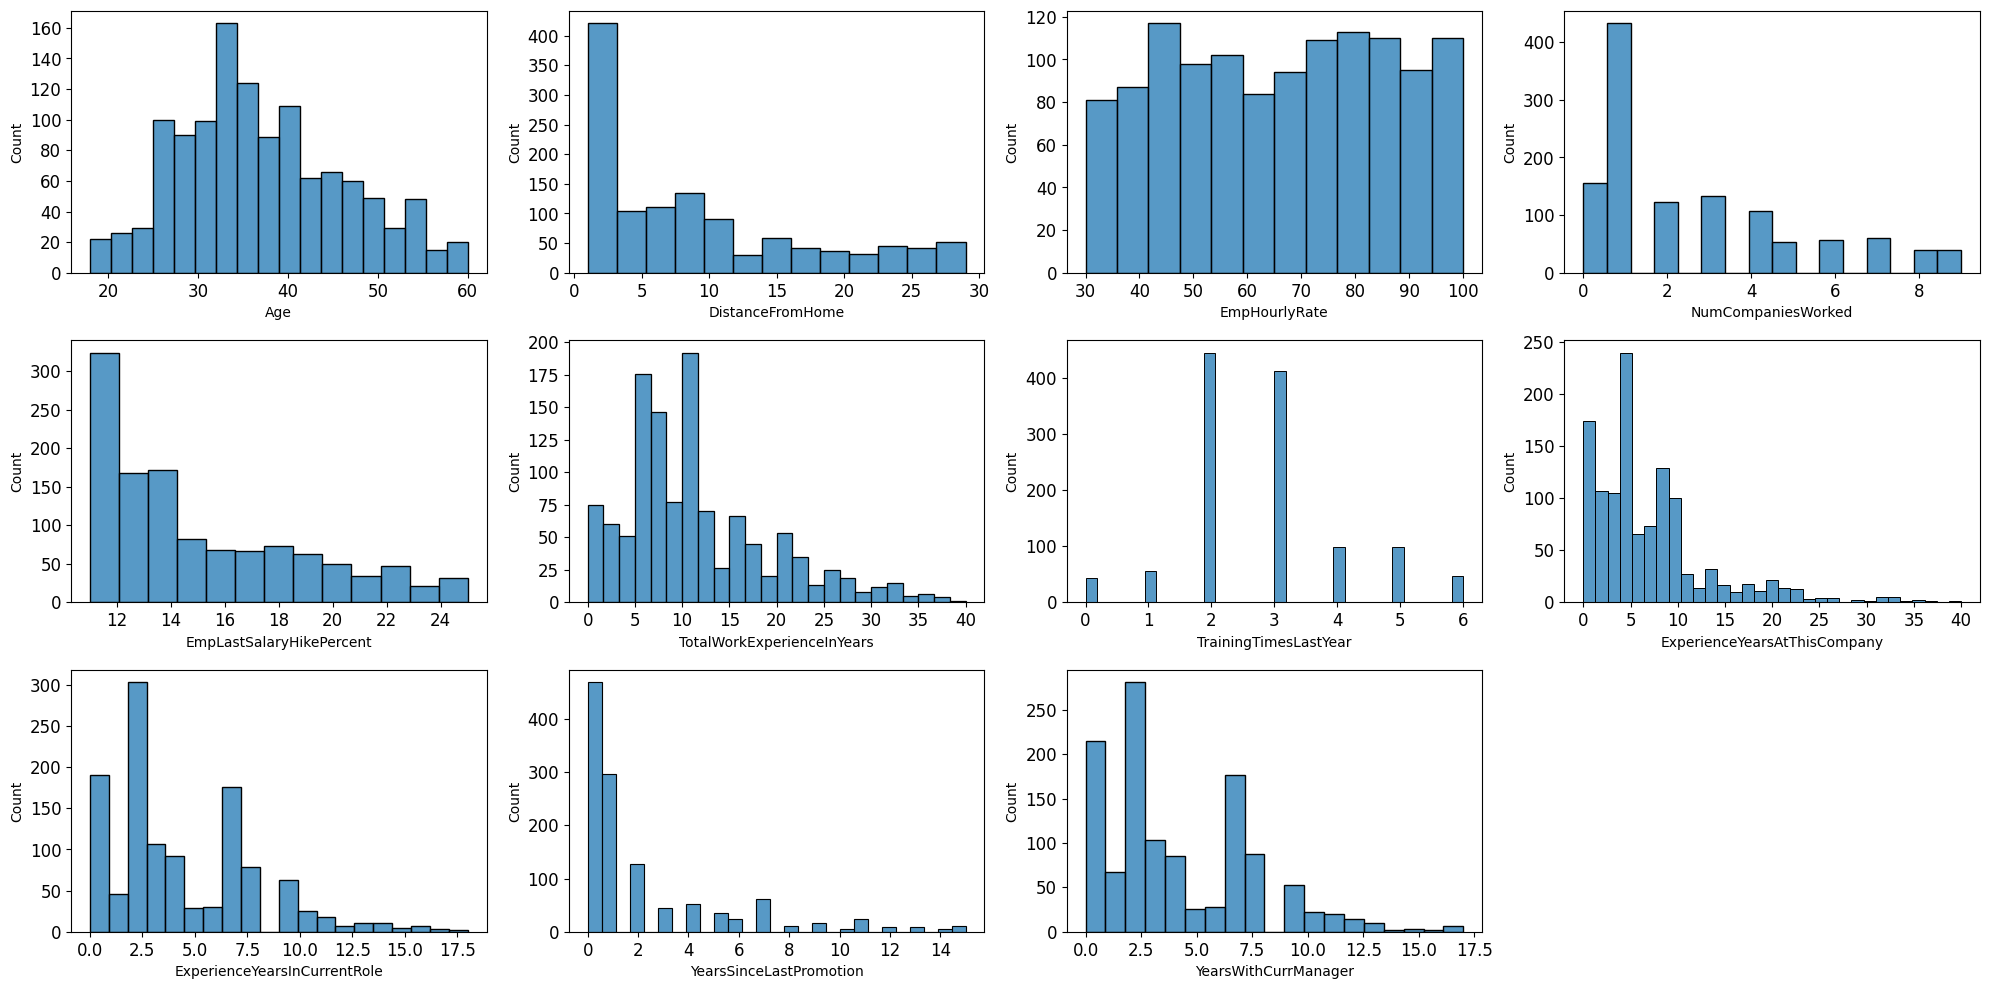

In [ ]:
# Univariate Analysis for Numerical Data

plt.figure(figsize=(20,10))                # Set Canvas size
plotnumber = 1
for i in num_data.columns :            # iterate over all columns
    plt.subplot(3,4,plotnumber)           # set number of plots in row and columns
    sns.histplot(x = data[i])             # visualise through histogram
    plt.xticks(fontsize=12)               # set X ticks with size
    plt.yticks(fontsize=12)               # set y ticks with size
    plotnumber = plotnumber + 1
plt.tight_layout()              # to avoid overlapping of images

#### Insights from Numerical Univariate Analysis :
* The majority of employees working at INX are in the age group of 25 to 40.
* Approximately 35% of employees reside within a 3 km range from the office,while 30% of employees live more than 10 km away from the office.
* All employees charging between 80 - 120 per hour.
13% employee are not worked for any company i.e they are freshers and 36% employee worked for only 1 company , so they are also freshers.
* 61% employee having only 11 - 15 % of salary hike from last salary.
* 70% employee get trained for 2 or 3 times in last year.
*35% employee having upto 5 year of experience while 40% having 10 - 15 year of experience.
* Only 10 % employees having more than 20 years of experiance, so they are loyal to the company and working hard.
* Only 60% employees having upto 5 year of working experience in Current role.
* Only 5% employee are not promoted from more than 10 years but upto 80% employee promoted within 2 years.
* 40% employee worked from last 2 year under the current manager.

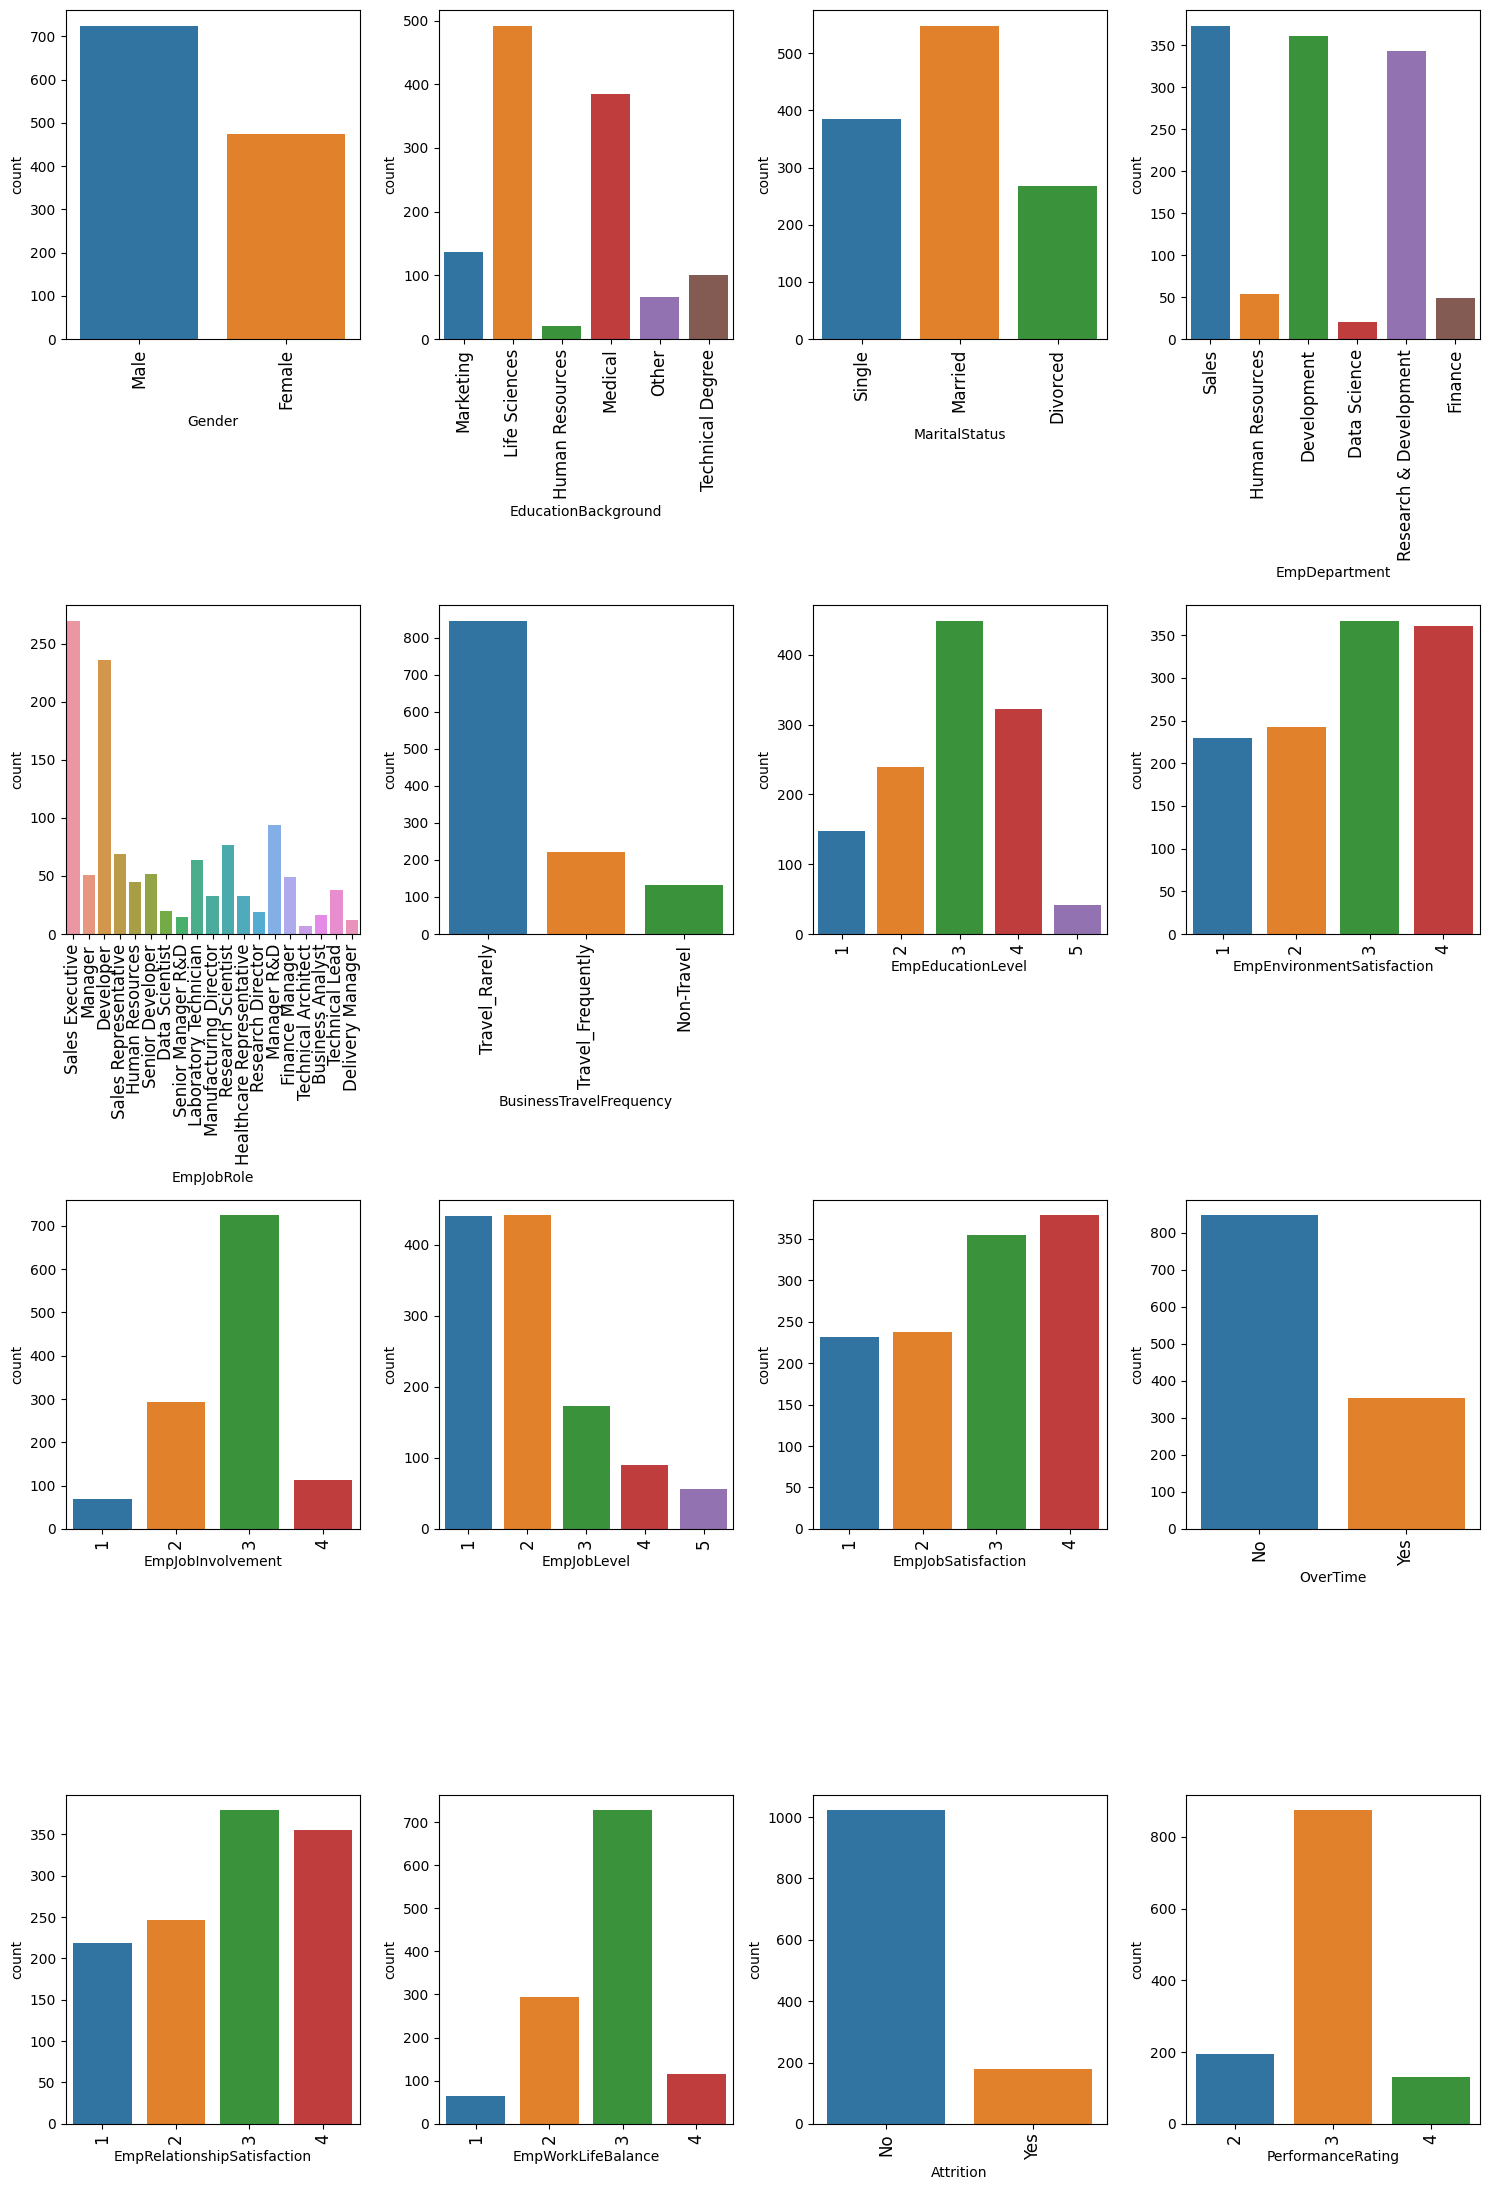

In [ ]:
# Univariate Analysis for Categorical Data

plt.figure(figsize=(15,22))                                     # Set canvas size
plotnumber = 1
for i in cat_data.columns :                                     # iterate over categorical data
    plt.subplot(4,4,plotnumber)                                 # set plots in a row & column
    sns.countplot(x = data[i])                                  # plot count plot
    plt.xticks(rotation = 90,fontsize=12)                       # set x_ticks size with rotation
    plotnumber = plotnumber + 1
plt.tight_layout()                                              # avoid overlapping

#### Insights from categorical univariate Analysis :
* In Gender there are 60% male & 40% female Employees.
41% employees having Life Science background, followed by medical background which is 32%.
* 46% employee are married , 32% single and 22% employee are divorsed.
* 31% employee in sales , 30% in Developement , 29% in research department.
* 22% employee works in Sales executive and 20% in developement role.
* 70% employee travels rarely and 18% travels frequently but 12 % are not travelled.
* 37% employee have lavel 3 , 27% have lavel 4 educational level.
* More than 60% employee having good environment Satisfaction rating of 3 or 4 out of 5 star.
* 60 % employee moderately involved in their job while only 9 % highly involved.
* Approximately 75% employee having 1 or 2 job level.
* 40% employee have not satisfied in their job while 60% employee satisfied.
* Only 30% employee prefered for over time, remaining are not.
40% employee have not satisfied relationship with their collegue or senior.
* Only 10% employee managed well their work life while 30% employee are not and 60% employee moderately balanced their work life.
* 85% employee are not dragged in job 15% are dragged or having attrition in job.
* Only 11% employee performs well in their work and 73% are moderate but 16% employee are not performed well.

(ii) Bi - Variate Analysis :

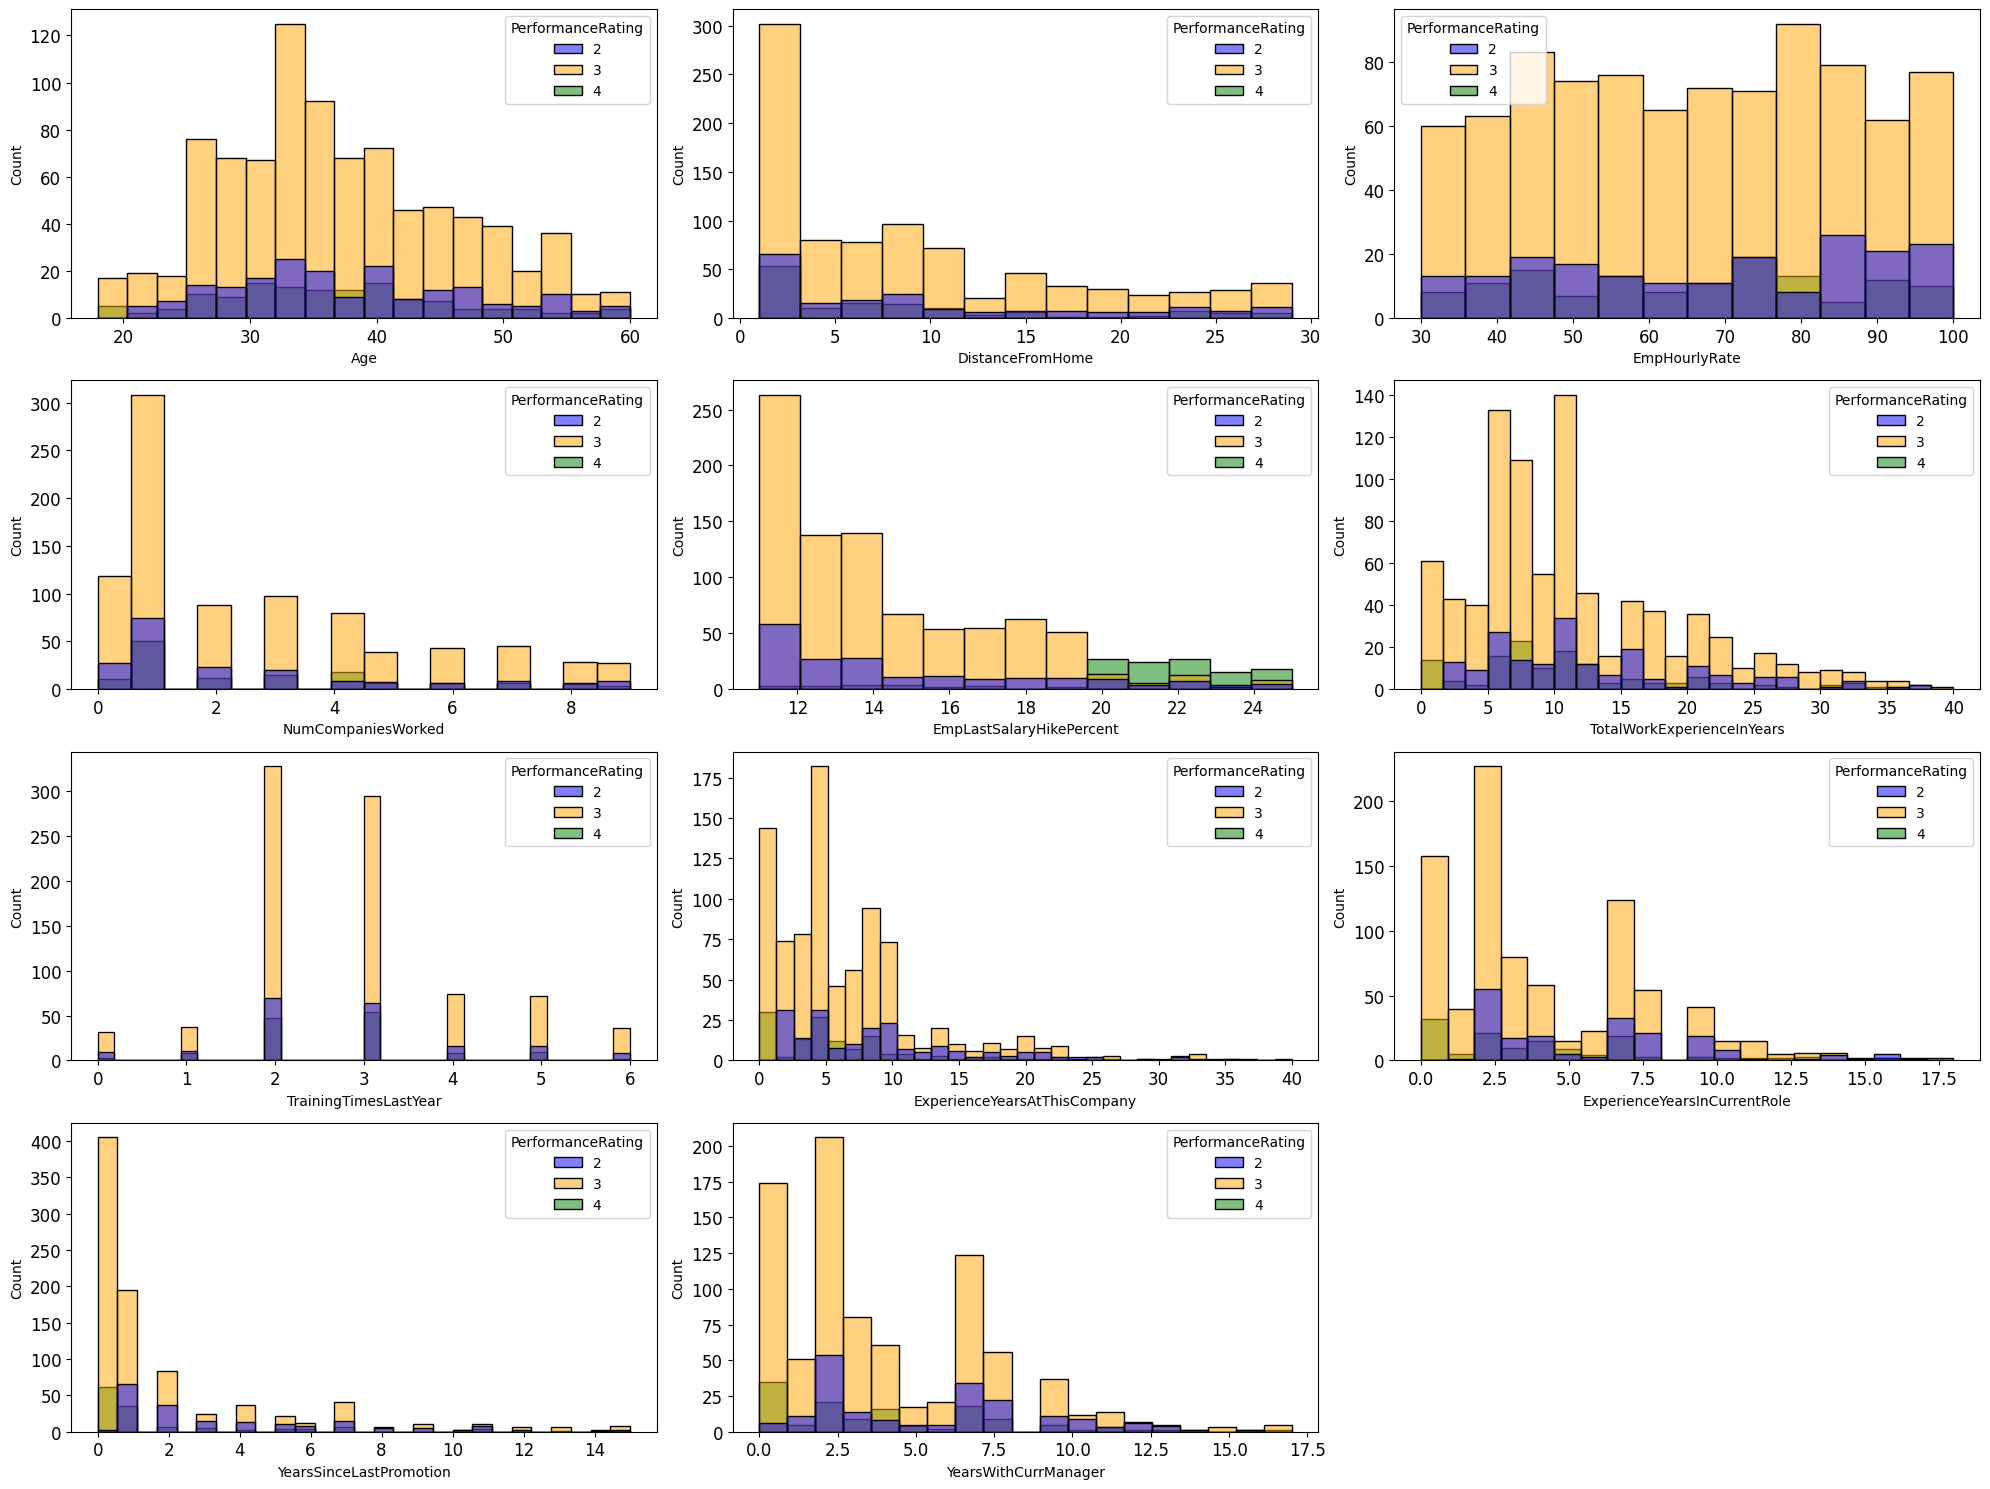

In [ ]:
# Bi - Variate Analysis for Numerical Data

plt.figure(figsize=(20,15))         # set canvas size
plotnumber = 1                      # set plot number as 1
for i in num_data.columns:         # iterate through num_data
    plt.subplot(4,3,plotnumber)     # set no. of rows & columns
    sns.histplot(x = data[i],hue = data.PerformanceRating,palette=["blue","orange","green"])
    plt.xticks(fontsize=12)         # xticks size
    plt.yticks(fontsize=12)         # yticks size
    plotnumber = plotnumber + 1     # set to iterate all plots
plt.tight_layout()                  # avoid from overlapping

#### Insights From Bivariate Analysis of Numerical Data :
* Employee whose age between 25 - 45 their performance seems to bad.
* whose distance of office from home is less then 10 km , their performance is Bad.
* whose Hourly rate is more than 85 , their performance is also bad.
* who worked for only one company their performance seems bad.
* whose salary hike is below 14% their performance is too low but whose hike is grater than 20 , their performance is very good.
* whose experience is between 5 - 15 years , their performance seems bad.
* whose training time is 2 or 3 times , their performance is bad.
* who are fresher or worked for 10 year in this company , their performance is bad.
* who worked for 2 year in same role , his performance is bad.
* employee who promoted with in 4 year , his performance is bad.
* employee who worked 2 year or more than 6.5 year under the current manager his performance is also bad.

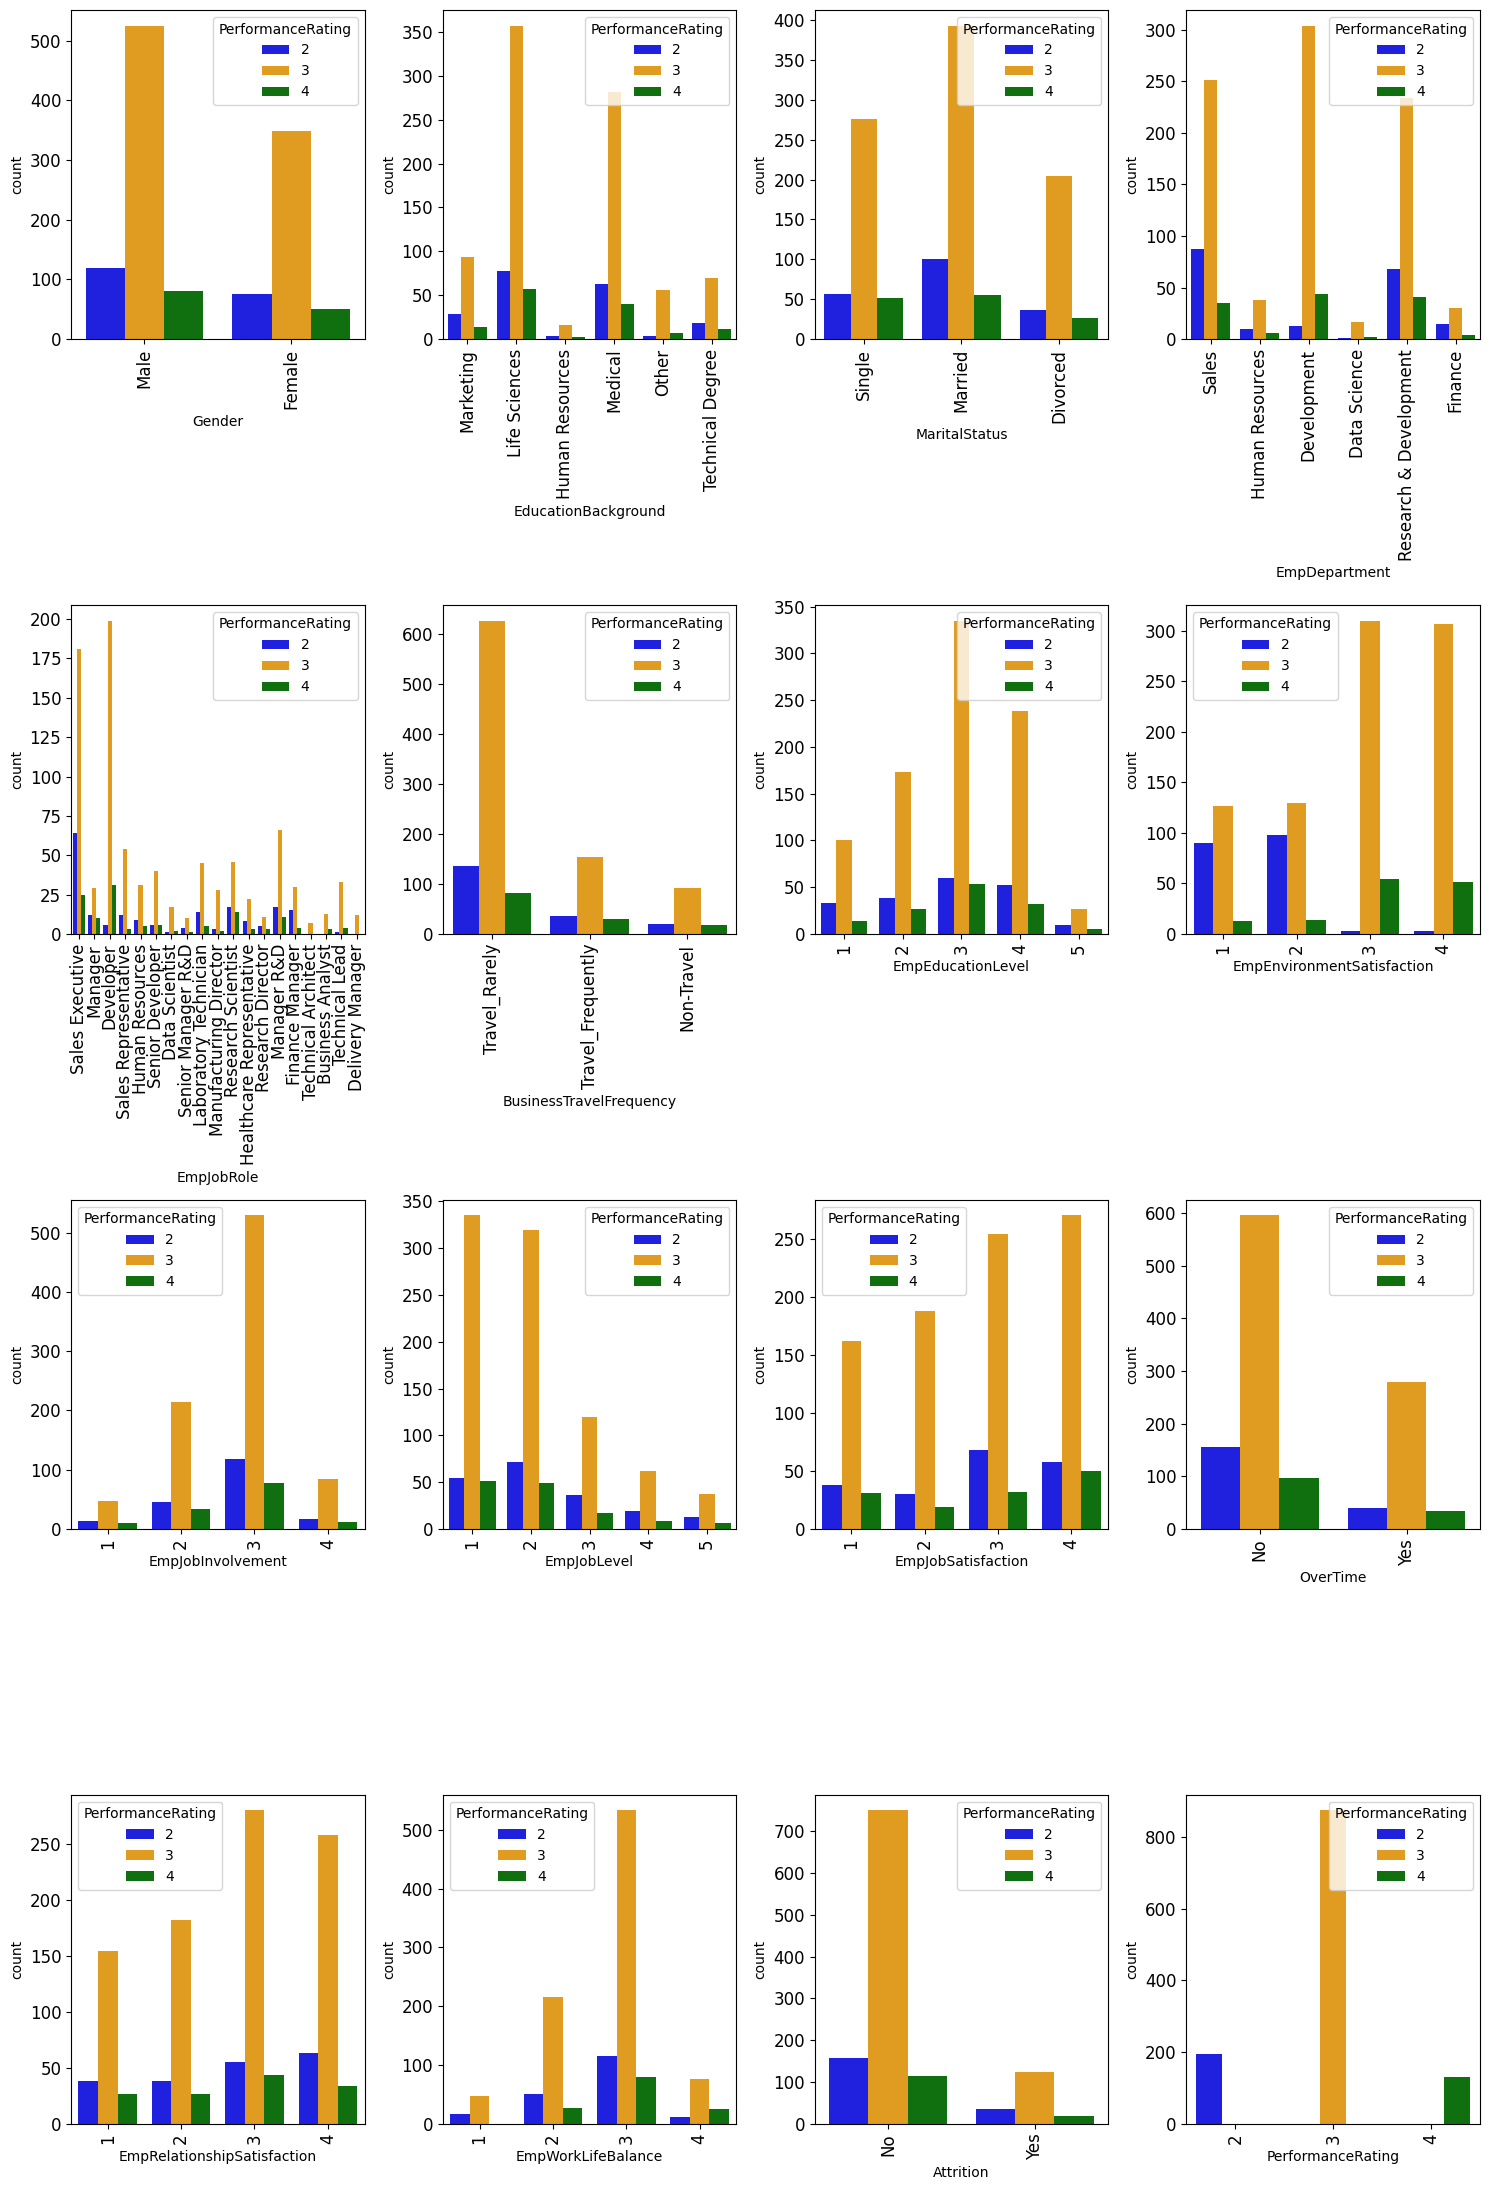

In [ ]:
# Bi-Variate Analysis for categorical Data

plt.figure(figsize=(15,22))                       # set canvas size
plotnumber = 1
for i in cat_data.columns :                       # iterate all categorical columns
    plt.subplot(4,4,plotnumber)                   # set rows and columns
    sns.countplot(x = data[i],hue = data.PerformanceRating,palette=["blue","orange","green"])
    plt.xticks(rotation = 90,fontsize=12)         # xticks size
    plt.yticks(fontsize=12)                       # yticks size
    plotnumber = plotnumber + 1
plt.tight_layout()                                # to avoid form overlapping

#### Insights from Bivariate Analysis of Categorical Data :
* The Male and female are almost same in their performance.
* A majority of employees in the fields of Life Science, Medicine, and Marketing seem to have poor performance.
* married employees performance is bad.
* Employees in Sales and Research & Development departments seem to have poor performance.
* Sales Execuitive Employees performance is bad.
* Rarely travelling employee performance is poor.
* Employee whose eduaction level are 3 and 4 their performance seems to bad.
* who are not satisfied in job environment , their performance seems too bad.
* whose job involvment is low or high , their performance is bad.
* Employee whose job level on 5 their performance seems to bad.
* whose relationship satisfaction rate is low , their performance is also low.
* whose work life is not balanced , their performance seems to low.
* who have attrition in their work life, their performance seems to bad.

# Department wise performances
In department wise performance, we have to analyze the data by each department present in the category. The data frame has to be separated or sliced according to department wise.

In Employee department feature there are six departments available.

* Sales
* Human Resoruces
* Development
* Data Science
* Reserch & Devlopment
* Finace

In [ ]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[4,26]].copy()
dept_per = dept.copy()

In [ ]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

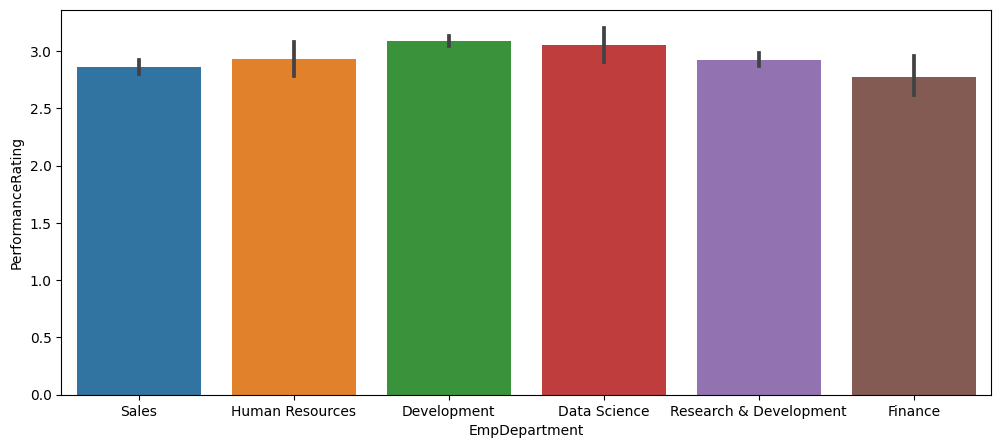

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x= dept_per['EmpDepartment'], y= dept_per['PerformanceRating'])
plt.show()

In [ ]:
# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [ ]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

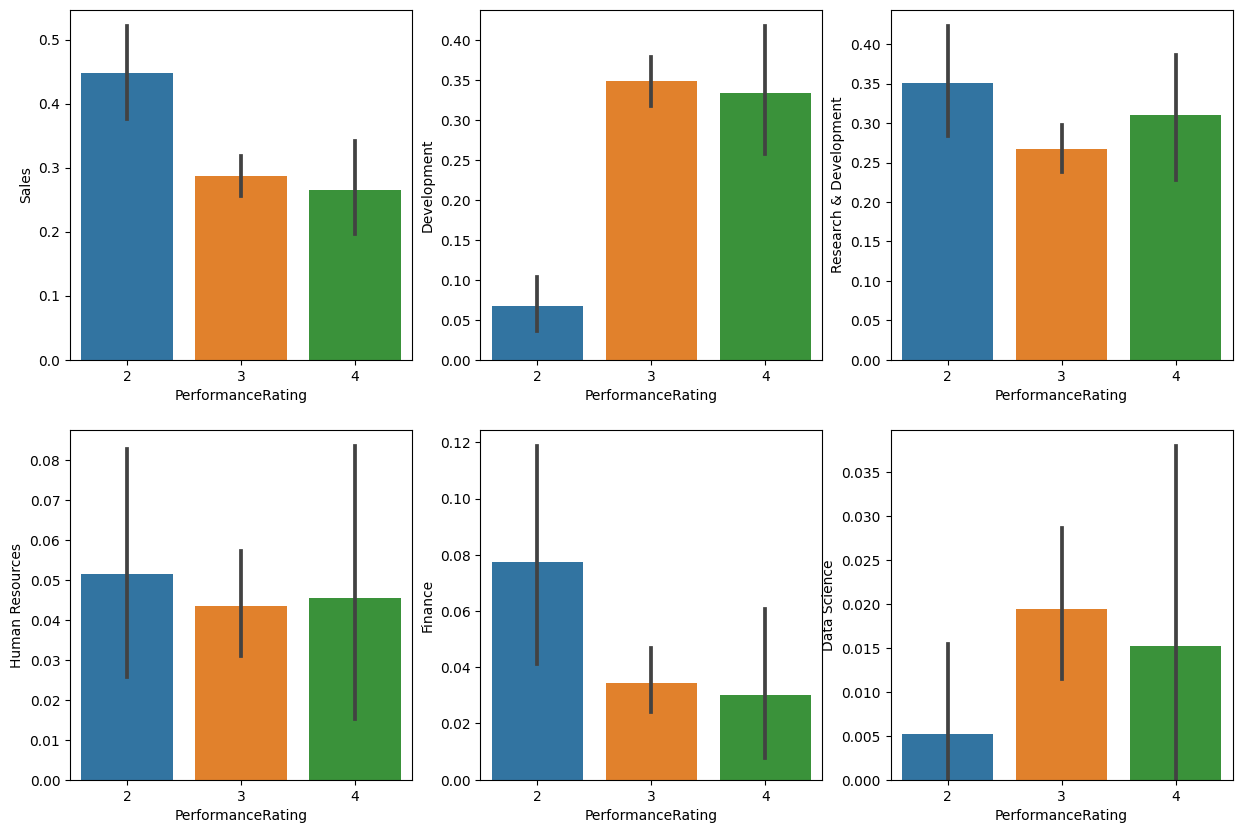

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting a separate bar graph for performance of each department using seaborn
df= dept_rating[['Sales','Development','Research & Development','Human Resources','Finance','Data Science']]
plt.figure(figsize=(15,10), facecolor='white')
plotnumber=1

for i in df:
    plt.subplot(2,3, plotnumber)
    sns.barplot(x= dept_rating['PerformanceRating'],y= df[i], data=data)
    plotnumber+=1
plt.show()
plt.tight_layout()

## Data Preprocessing : -
( i ) . Handle Missing Values :

In [ ]:
# to see all missing values present in dataset
data.isnull().sum()

### No missing values are present in data set.

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

( ii ) . Handle Outlier:

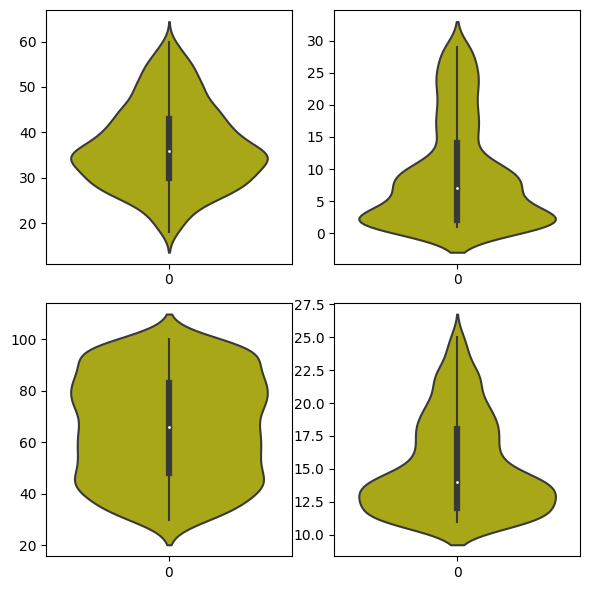

In [ ]:
# outlier checking for contineous variable
plt.figure(figsize=(6,6))
plotnumber = 1
for i in ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent'] :
    plt.subplot(2,2,plotnumber)
    sns.violinplot(data[i],color='y')
    plotnumber = plotnumber + 1
plt.tight_layout()

( iii ) . Handle Cateorical Data

###### Gender

In [ ]:
# count values for Gender
data['Gender'].value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [ ]:
# Change Gender columns from categorical to numerical using map function

data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

###### EducationBackground

In [ ]:
# Value counts for Educational Background
data['EducationBackground'].value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [ ]:
# Change EducationBackground columns from categorical to numerical manually using map function

data['EducationBackground'] = data['EducationBackground'].map({"Human Resources":0 , "Other":1 ,"Technical Degree":2 ,
                                 "Marketing":3 , "Medical":4 ,"Life Sciences":5})

###### MaritalStatus

In [ ]:
# Value counts for MaritalStatus
data['MaritalStatus'].value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [ ]:
# Change MaritalStatus columns from categorical to numerical  using replace function

data["MaritalStatus"].replace({"Divorced":0 , "Single":1 , "Married":2},inplace=True)

######EmpDepartment

In [ ]:
# Value counts for EmpDepartment
data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [ ]:
# Change EmpDepartment columns from categorical to numerical  using replace function

data['EmpDepartment'].replace({"Data Science":0 , "Finance":1 , "Human Resources":2 , "Research & Development":3 ,
                               "Development":4 , "Sales":5},inplace=True)

######EmpJobRole

In [ ]:
# Value counts for EmpJobRole
data['EmpJobRole'].value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [ ]:
# we have nineteen unique values for that we use label encoding

from sklearn.preprocessing import LabelEncoder         # import label Encoding from sklearn's preprocessing module
Label_Encoder = LabelEncoder()                         # create a object of Label Encoder

In [ ]:
# Apply Label encoding on Emp Job Role
data['EmpJobRole'] = Label_Encoder.fit_transform(data['EmpJobRole'])

######BusinessTravelFrequency

In [ ]:
# Value counts for BusinessTravelFrequency
data['BusinessTravelFrequency'].value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [ ]:
# changedata BusinessTravelFrequency categorical data to numerical using map function

data['BusinessTravelFrequency'] = data['BusinessTravelFrequency'].map({"Non-Travel":0 , "Travel_Frequently":1 ,
                                                                       "Travel_Rarely":2})

######OverTime

In [ ]:
# Value counts for OverTime
data['OverTime'].value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [ ]:
# changedata OverTime categorical data to numerical using Replace function

data['OverTime'].replace({"No":0 , "Yes":1},inplace=True)

######Attrition

In [ ]:
# Value counts for Attrition
data['Attrition'].value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [ ]:
# changedata Attrition categorical data to numerical using Replace function

data['Attrition'].replace({"No":0 , "Yes":1},inplace=True)

######PerformanceRating

In [ ]:
# Value Counts for PerformanceRating
data['PerformanceRating'].value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [ ]:
# This is  a multiclass classification , so for better accuracy we convert output into 0 , 1 & 2.

data['PerformanceRating'].replace({2:0 , 3:1 , 4:2},inplace=True)

##Feature Selection :

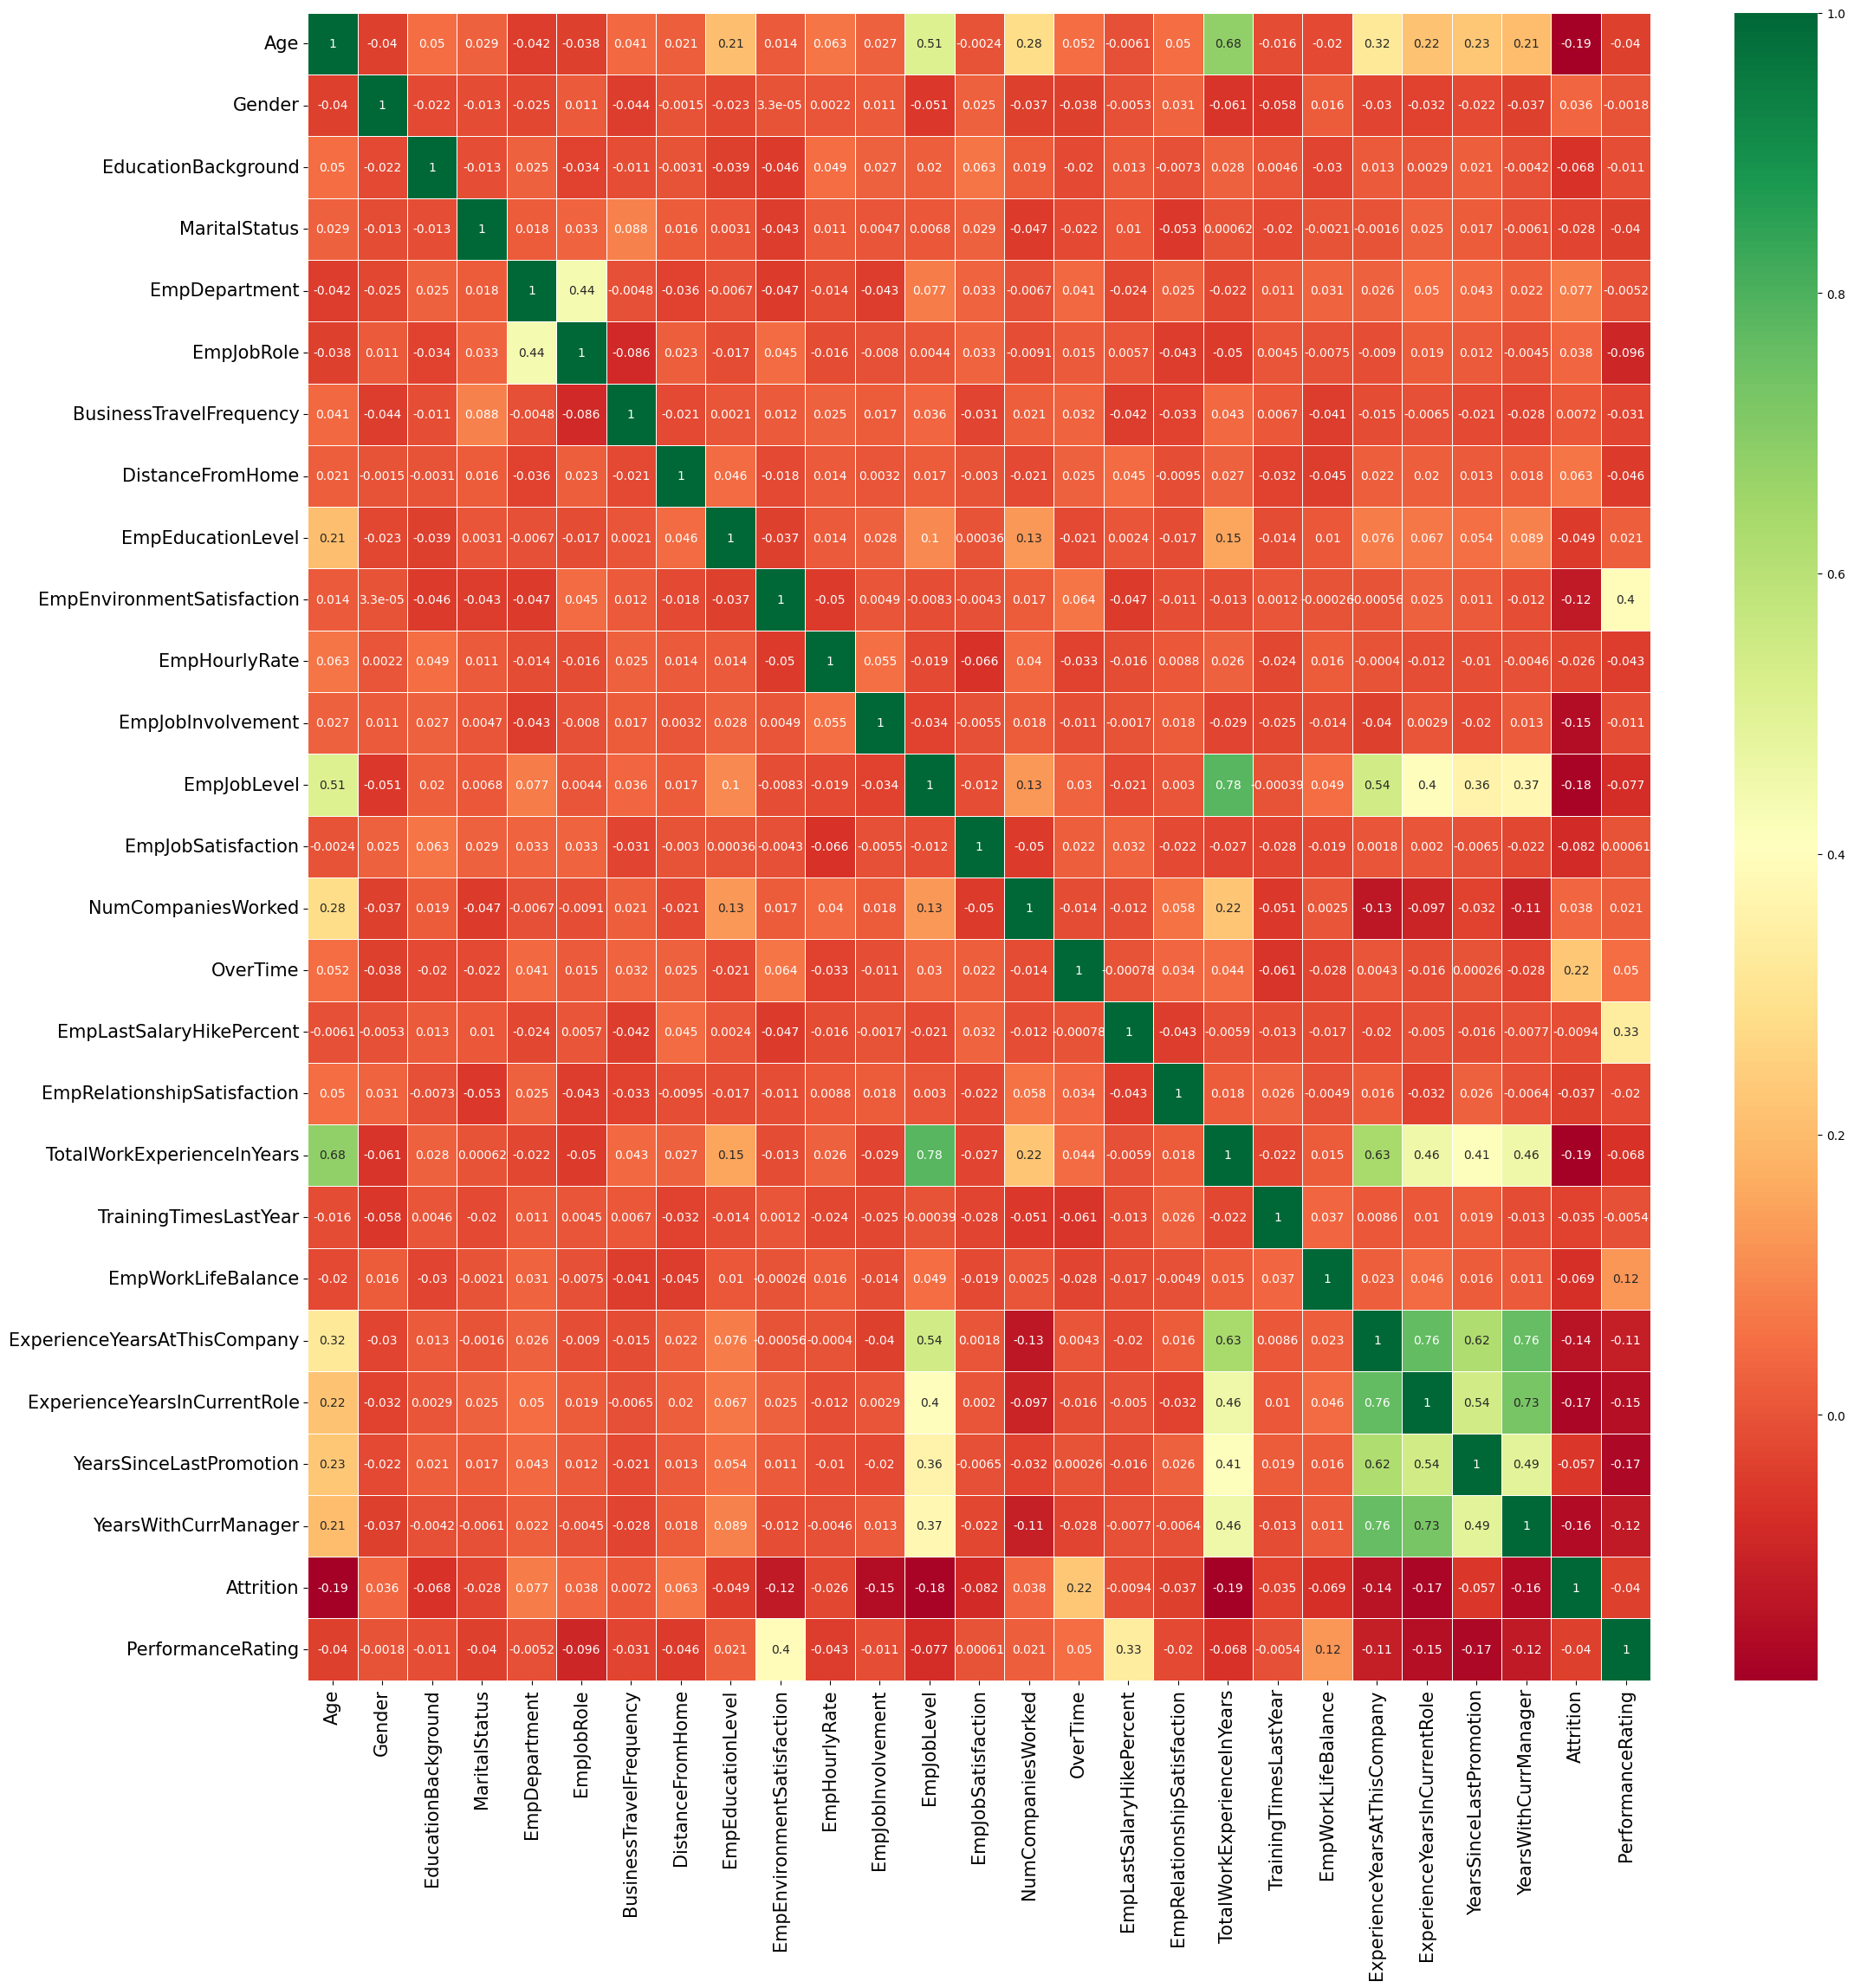

In [ ]:
# use heat map to check correlation of each features with each others
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.65,annot_kws={"size": 10})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Insights From Heatmap :
* independent features are Not correlated with each other.

* And some independent features have no correlation with target class , so we will drop them.

* ( Gender , EmpDepartment , EmpJobSatisfaction , TrainingTimesLastYear ) these columns have no corelation or little corelation with target variable.

* EmpEnvironmentSatisfaction , EmpLastSalaryHikePercent & EmpWorkLifeBalance are the Top three features that highily affect the Employees Performance Rating.

## Model Creation

In [ ]:
# Create Dependent and Independent variable

X = data.drop(['Gender' , 'EmpDepartment' , 'EmpJobSatisfaction' , 'TrainingTimesLastYear' , 'PerformanceRating'],axis=1)
y = data['PerformanceRating']

In [ ]:
X.head()

,Age,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,3,1,13,2,10,3,4,55,3,2,1,0,12,4,10,2,10,7,0,8,0
1,47,3,1,13,2,14,4,4,42,3,2,2,0,12,4,20,3,7,7,1,7,0
2,40,5,2,13,1,5,4,4,48,2,3,5,1,21,3,20,3,18,13,1,12,0
3,41,0,0,8,2,10,4,2,73,2,5,3,0,15,2,23,2,21,6,12,6,0
4,60,3,1,13,2,16,4,1,84,3,2,8,0,14,4,10,3,2,2,2,2,0


In [ ]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: PerformanceRating, dtype: int64

##### Data Balancing :
* Data Balancing is the process of adjusting the class distribution in a dataset such that each class has a relatively equal number of Samples.
* when dealing with imbalanced datasets, where one class's rarity can lead to biased model predictions and it reduce the models overal performance for that we use SMOTE techinique.
* " SMOTE " Generating synthetic examples for the minority class based on the existing data.

In [ ]:
# Value Counts for PerformanceRating
data['PerformanceRating'].value_counts()

### The target class are not equally distributed.

1    874
0    194
2    132
Name: PerformanceRating, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE           # Import Smote from imblearn.over_sampling
smote = SMOTE()                                    # Create a variable of smote

# apply SMOTE on target variable
X_smote , y_smote = smote.fit_resample(X,y)

In [ ]:
# importing counter to check count of each label
from collections import Counter
print("Class Before SMOTE : ",Counter(y))                       # checking count for each class
print("Class After SMOTE : ",Counter(y_smote))                  # checking count for each class

Class Before SMOTE :  Counter({1: 874, 0: 194, 2: 132})
Class After SMOTE :  Counter({1: 874, 2: 874, 0: 874})


In [ ]:
# Split Data into Train and Test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=10)

## Model Selection :
###( i ) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression          # import logistic regression
log_reg = LogisticRegression(multi_class='ovr',random_state=1)              # create object for multiclass

log_reg.fit(X_train,y_train)                                 # train logistic regression with data
y_log_pred = log_reg.predict(X_test)                         # make prediction using x_test

In [ ]:
# print predicted values
y_log_pred

array([0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0,
       1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2,
       0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1,
       0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2,

In [ ]:
# print original values
y_test.values

array([0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0,
       1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2,
       1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2,
       0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1,
       1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2,

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score , f1_score , confusion_matrix ,classification_report , precision_score , recall_score

In [ ]:
# print Confusion matrics
confusion_matrix(y_test,y_log_pred)

array([[181,  20,  12],
       [ 24, 171,  22],
       [  8,  17, 201]])

In [ ]:
# test model performance
acc_log = accuracy_score(y_test,y_log_pred)
print("Accuracy of Logistic regression : ",acc_log)

Accuracy of Logistic regression :  0.8429878048780488


In [ ]:
# test model performance
f1_log = f1_score(y_test,y_log_pred,average='weighted')
print("f1_score of Logistic regression : ",f1_log)

f1_score of Logistic regression :  0.8425260646028688


In [ ]:
# print Classification report
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       213
           1       0.82      0.79      0.80       217
           2       0.86      0.89      0.87       226

    accuracy                           0.84       656
   macro avg       0.84      0.84      0.84       656
weighted avg       0.84      0.84      0.84       656



### Hyperparameter Tunning of Logistic Regression
* **Hyperparameter Tunning** is the process of finding the best set of hyperparameters for a machine learning model to achieve optimal performance on a given dataset.
* In hyperparameter tunning the model perform and calculate accuracy with all possible parameter given to it internally and give the best parameters which give the best performance.
* **Grid Search** and **Random Search** are two commonly used methods for Hyperparameter tunning.

In [ ]:
# import GridSearchCV or RandomizedSearchCV to iterate through all parameters and make a model with all combination

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# creating dictionary --> key value pair of hyperparameters having key as parameter and values as its values
Log_Hyperpara = {
    'C': [0.001, 0.01, 0.1, 1, 10, 1000],                 # Regularization strength values
    'solver': ['lbfgs', 'liblinear', 'saga'],             # Solver options
    'max_iter':[100,200,400,600,800,1000],                # maximum iteration
    'multi_class':['ovr','multinomial']                   # how to perform multiclass classification
}

# training data on gridsearch cv for finding best parameters
Log_grid = GridSearchCV(LogisticRegression(random_state=0),         # Estimator
                       param_grid=Log_Hyperpara,      # param_grid----> hyperparametes(dictionary we created)
                       scoring='accuracy',            # scoring---> performance matrix to check performance
                       cv=3,                          # cv------> number of flods
                       verbose=3,                     # verbose=Controls the verbosity: the higher, the more messages.
                       n_jobs=-1                      # Number of jobs to run in parallel,-1 means using all processors.
                       )

# training data on gridsearch cv for finding best parameters
Log_grid.fit(X_train,y_train)

print(f"Best Score: {Log_grid.best_score_})")         # printing  best score
print(f"Best paramters: {Log_grid.best_params_})")    # printing  best parameters

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Score: 0.8331580090610067)
Best paramters: {'C': 0.01, 'max_iter': 600, 'multi_class': 'multinomial', 'solver': 'lbfgs'})


In [ ]:
# Train the final model with the best hyperparameters on the full training data
log_reg_hyp = LogisticRegression(C= 0.1, max_iter =  500, multi_class = 'multinomial', solver = 'lbfgs')
log_reg_hyp.fit(X_train, y_train)

# Evaluate the final model on the test data
y_hyp_log = log_reg_hyp.predict(X_test)
acc_hyp_log = accuracy_score(y_test, y_hyp_log)
print("Accuracy of Logistic regression : ",acc_hyp_log)

Accuracy of Logistic regression :  0.8551829268292683


In [ ]:
# print classification report
print(classification_report(y_test,y_hyp_log))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       213
           1       0.83      0.78      0.81       217
           2       0.86      0.92      0.89       226

    accuracy                           0.86       656
   macro avg       0.85      0.85      0.85       656
weighted avg       0.85      0.86      0.85       656



(ii) K Nearest Neighbour

In [ ]:
import numpy as np

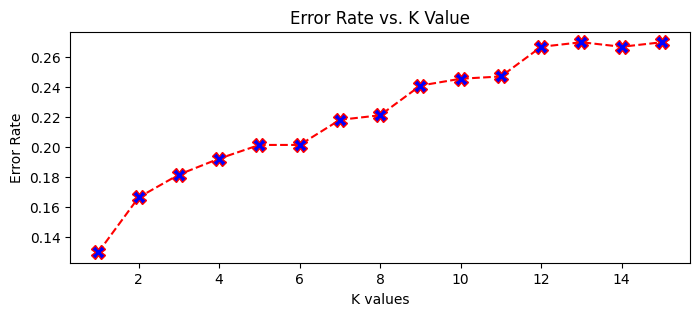

In [ ]:
# taking optimal k to determine how many nearest neighbors  required to create model

from sklearn.neighbors import KNeighborsClassifier               # import KNeighborsClassifier
Error_rate = []                                                  # create a list to store erroe for each k value
for K in range(1,16):                                            # use for loop to iterate from 1 to 16.
    model = KNeighborsClassifier(n_neighbors=K)                  # create model
    model.fit(X_train,y_train)                                   # train model
    y_pred = model.predict(X_test)                               # predict X_test
    Error_rate.append(np.mean(y_pred != y_test))                 # append error in empty list


# plot a graph between K values and Error Rate
plt.figure(figsize=(8,3))
plt.plot(range(1,16),Error_rate,linestyle='dashed',color='red',marker='X',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)                  # define KNN model
knn.fit(X_train,y_train)                                   # train KNN model
y_pr_knn = knn.predict(X_test)                             # make prediction for test data
acc_knn = accuracy_score(y_pr_knn,y_test)                  # check performance
print("Accuracy of K nearest Neighbour : ",acc_knn)

Accuracy of K nearest Neighbour :  0.8185975609756098


In [ ]:
# print f1 score
f1_knn = f1_score(y_test,y_pr_knn,average='weighted')
print("f1_score of K neighbour : ",f1_knn)

f1_score of K neighbour :  0.8005251942487925


In [ ]:
# print classification report
print(classification_report(y_test,y_pr_knn))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       213
           1       0.97      0.48      0.64       217
           2       0.87      0.99      0.92       226

    accuracy                           0.82       656
   macro avg       0.85      0.82      0.80       656
weighted avg       0.85      0.82      0.80       656



#### Hyperparameter Tunning for K nearest neighbour

In [ ]:
# creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
Knn_Hyperpara = {
    'n_neighbors': range(1, 21),                       # Test k from 1 to 20 (you can adjust this range)
    'weights':['uniform','distance'],                  # neighbors' contributions are  weighted when making predictions.
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics to consider
}

# Perform grid search by defining all parameters
Knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), # which model
                               param_grid=Knn_Hyperpara,         # hyperparametes(dictionary we created)
                               cv=3,                             # number of folds
                               scoring='accuracy',               # performance matrix to check performance
                               verbose=3)

# train grid to find best parameters
Knn_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.828 total time=   0.1s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.850 total time=   0.1s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.853 total time=   0.1s
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.828 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.850 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.853 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.779 total time=   0.1s
[CV 2/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.803 total time=   0.1s
[CV 3/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.806 total time=   0.1s
[CV 1/3] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.828 to

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [ ]:
# print best score and best parameters
print("Best Hyperparameters:", Knn_grid_search.best_params_)
print("Best Accuracy:", Knn_grid_search.best_score_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Accuracy: 0.8535119158443493


In [ ]:
# Define knn model and train with best parameters
knn_hyp = KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='distance')
knn_hyp.fit(X_train,y_train)                                    # train KNN model
y_hyp_knn = knn_hyp.predict(X_test)                             # make prediction for test data
acc_hyp_knn = accuracy_score(y_hyp_knn,y_test)                  # check performance
print("Accuracy of K nearest Neighbour : ",acc_hyp_knn)

Accuracy of K nearest Neighbour :  0.850609756097561


In [ ]:
# Print classification report
print(classification_report(y_test,y_hyp_knn))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       213
           1       0.98      0.56      0.71       217
           2       0.85      0.99      0.91       226

    accuracy                           0.85       656
   macro avg       0.87      0.85      0.83       656
weighted avg       0.87      0.85      0.83       656



(iii) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier    # import random forest classifier
forest = RandomForestClassifier(random_state=1)        # create a variable
forest.fit(X_train,y_train)                            # train random forest
y_pr_forest = forest.predict(X_test)                   # make prediction

In [ ]:
# Check Performance
acc_forest = accuracy_score(y_test,y_pr_forest)
print("Accuracy of Random Forest :  ",acc_forest)

Accuracy of Random Forest :   0.9649390243902439


In [ ]:
# test F1 Score
f1_forest = f1_score(y_test , y_pr_forest , average='weighted')
print("f1_score of  : " , f1_forest)

f1_score of  :  0.9648774514427279


In [ ]:
# classification report
print(classification_report(y_test,y_pr_forest))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       213
           1       0.95      0.94      0.95       217
           2       0.98      0.96      0.97       226

    accuracy                           0.96       656
   macro avg       0.96      0.97      0.96       656
weighted avg       0.96      0.96      0.96       656



####Hyperparameter Tunning of Random Forest

In [ ]:
# create a dictionary of hyperparameters with values
Forest_Hyperparameter = {
    'n_estimators': [50,100, 200,300,400],        # Number of trees in the forest
    'max_depth': [None, range(1,20)],                  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']          # Number of features to consider when splitting
}

# Perform grid search with cross-validation
forest_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=31),
                                         param_distributions=Forest_Hyperparameter,
                                         n_iter=100,
                                         n_jobs=-1,
                                         scoring='accuracy' ,
                                         cv=3,
                                         verbose=3,random_state=0)

# Train random random search
forest_random_search.fit(X_train,y_train)

# print best parameters and score
print("Best Score:", forest_random_search.best_score_)
print("Best Hyperparameters:", forest_random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
159 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
159 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best Score: 0.9527012350276175
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [ ]:
# Train random forest model with best parameters
hyp_forest = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,
                                max_features='auto',max_depth=None,random_state=3)
hyp_forest.fit(X_train,y_train)
y_hyp_forest = hyp_forest.predict(X_test)

# Check Performance
acc_hyp_forest = accuracy_score(y_test,y_hyp_forest)
print("Accuracy of Random Forest After Hyperparameter Tunning :  ",acc_hyp_forest)

Accuracy of Random Forest After Hyperparameter Tunning :   0.9649390243902439


(iv) Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier   # import Gradient Boosting
gbc = GradientBoostingClassifier(random_state=0)          # craete a variable of GradientBoostingClassifier
gbc.fit(X_train,y_train)                                  # train GradientBoostingClassifier
y_pr_gbc = gbc.predict(X_test)                            # make prediction

In [ ]:
# check performance of GradientBoostingClassifier
acc_gbc = accuracy_score(y_test,y_pr_gbc)
print("Accuracy of Gradiend Boost : ",acc_gbc)

Accuracy of Gradiend Boost :  0.961890243902439


In [ ]:
# test F1 Score
f1_gbc = f1_score(y_test , y_pr_gbc , average='weighted')
print("f1_score of  Gboost: " , f1_gbc)

f1_score of  Gboost:  0.9617630430506782


In [ ]:
print(classification_report(y_test , y_pr_gbc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       213
           1       0.96      0.93      0.95       217
           2       0.97      0.97      0.97       226

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



####Hyperparameter Tunning of Gradient Boosting

In [ ]:
# Define a grid of hyperparameters to search
GB_hyperpara = {
    'n_estimators': [50, 100, 200,300],        # Number of trees in the forest
    'max_depth': [None, range(1,20)],                  # Maximum depth of the trees
    'min_samples_split': [2, 5],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']           # Number of features to consider when splitting
}

# Perform grid search with cross-validation
GB_Grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
                             param_grid=GB_hyperpara,
                             cv=3,
                             scoring='accuracy',
                             verbose=3,n_jobs=-1)
# Train Grid Search
GB_Grid_search.fit(X_train,y_train)

# print best score and parameter
print("Best Score : ",GB_Grid_search.best_score_)
print("Best Parameters : ",GB_Grid_search.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Score :  0.9557492397443058
Best Parameters :  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Train Gradient Boost model with best parameters
hyp_gbc = GradientBoostingClassifier(n_estimators=500,min_samples_split=2,min_samples_leaf=1,
                                max_features='auto',max_depth=None,random_state=0)
hyp_gbc.fit(X_train,y_train)
y_hyp_gbc = hyp_gbc.predict(X_test)

# Check Performance
acc_hyp_gbc = accuracy_score(y_test,y_hyp_gbc)
print("Accuracy of Gradient Boost After Hyperparameter Tunning :  ",acc_hyp_gbc)

Accuracy of Gradient Boost After Hyperparameter Tunning :   0.9451219512195121


(v) Extreme Gradient Boosting Classifier

In [ ]:
from xgboost import XGBClassifier        # import XGBClassifier
xgb = XGBClassifier()                    # make a variable of XGBClassifier
xgb.fit(X_train,y_train)                 # train XGBClassifier
y_pr_xgb = xgb.predict(X_test)           # make prediction

In [ ]:
# Check Performance
acc_xgb = accuracy_score(y_test,y_pr_xgb)
print("Accuracy of XGBClassifier :  ",acc_xgb)

Accuracy of XGBClassifier :   0.9710365853658537


In [ ]:
# test F1 Score
f1_xgb = f1_score(y_test , y_pr_gbc , average='weighted')
print("f1_score of  XG boost: " , f1_xgb)

f1_score of  XG boost:  0.9617630430506782


In [ ]:
# print classification report
print(classification_report(y_test,y_pr_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       213
           1       0.97      0.95      0.96       217
           2       0.98      0.97      0.98       226

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



####Hyperparameter Tunning of Extreme Gradient Boost

In [ ]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
xgb_hyperpara = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'max_depth': [None,range(1,20)],
              'n_estimators': [50,100,150,200,250,300],
              'reg_alpha': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6],
              'reg_lambda': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6]}

xgb_random_search= RandomizedSearchCV(estimator=XGBClassifier(random_state=2),
                                      param_distributions=xgb_hyperpara,        # hyperparametes(dictionary we created)
                                      scoring='accuracy',                       # matrix to check performance
                                      n_iter=100,                               # maximum no. of itertation
                                      cv=3,                                     # number of flods
                                      verbose=2,                       # Controls the verbosity: the higher, the more messages.
                                      random_state=3,
                                      n_jobs=-1)                       # -1 means using all processors.

# training data on randomsearch cv
xgb_random_search.fit(X_train, y_train)

# Print best score and parameters
print(f"Best Score : {xgb_random_search.best_score_}")
print(f"Best paramters: {xgb_random_search.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score : 0.944559517160057
Best paramters: {'reg_lambda': 3.2, 'reg_alpha': 0.4, 'n_estimators': 150, 'max_depth': None, 'learning_rate': 0.4, 'gamma': 0.2}


In [ ]:
# Train XGBClassifier with best parameters
Xgb_hyp=XGBClassifier(reg_lambda= 1, reg_alpha= 0.1, n_estimators=130, max_depth=None, learning_rate= 0.6, gamma=0.1)
Xgb_hyp.fit(X_train, y_train)
y_hyp_xgb=Xgb_hyp.predict(X_test)

# Check performance of XGBClassifier after Hyperparameter Tunning
acc_hyp_xgb = accuracy_score(y_hyp_xgb,y_test)
print("Accuracy of XGBClassifier after Hyperparameter Tunning : ",acc_hyp_xgb)

Accuracy of XGBClassifier after Hyperparameter Tunning :  0.961890243902439


(vii) MLP Classifier

In [ ]:
# Import MLP classifier and train with best parameters and make prediction for y_pred
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=1,hidden_layer_sizes=(255),activation='relu',alpha=0.1,learning_rate='constant')
ann.fit(X_train,y_train)
y_pr_ann = ann.predict(X_test)

In [ ]:
# check performance of MLPClassifier
acc_ann = accuracy_score(y_test,y_pr_ann)
print(f"Accuracy Score of MLPClassifier : {acc_ann}")

Accuracy Score of MLPClassifier : 0.9054878048780488


In [ ]:
# test F1 Score
f1_mlp = f1_score(y_test , y_pr_ann , average='weighted')
print("f1_score of  MLP classifier: " , f1_mlp)

f1_score of  MLP classifier:  0.9041327738529379


In [ ]:
print(classification_report(y_test,y_pr_ann))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       213
           1       0.91      0.81      0.86       217
           2       0.89      0.96      0.93       226

    accuracy                           0.91       656
   macro avg       0.91      0.90      0.90       656
weighted avg       0.91      0.91      0.90       656



#Model Comparision Report

In [ ]:
# Create a Data Frame of

Results = pd.DataFrame({"Model_name" : ['Logistic Regression','K Neighbour','Random Forest','Gradient Boost','Extreme GB','MLP Classifier'] ,

                        "Accuracy Score" : [acc_log , acc_knn ,acc_forest , acc_gbc , acc_xgb , acc_ann],

                        "F1 Score" : [f1_log , f1_knn , f1_forest , f1_gbc , f1_xgb , f1_mlp] ,

                        "Hyperparameter Score" : [acc_hyp_log , acc_hyp_knn , acc_hyp_forest , acc_hyp_gbc , acc_hyp_xgb , "Not Available"]
                       })

In [ ]:
Results

,Model_name,Accuracy Score,F1 Score,Hyperparameter Score
0,Logistic Regression,0.842988,0.842526,0.855183
1,K Neighbour,0.818598,0.800525,0.85061
2,Random Forest,0.964939,0.964877,0.964939
3,Gradient Boost,0.961890,0.961763,0.945122
4,Extreme GB,0.971037,0.961763,0.96189
5,MLP Classifier,0.905488,0.904133,Not Available


#Conclusion of Model Comparison Report
I have used 6 Algorithmns which are LogisticRegression,K nearest Neighbour , RandomForestClassifier,Gradient Boost,XG Boost and ANN_MLPClassifier for training the model. I got **97.1 percentage in XGradientBoosting with out hyperparameter tunning** which is maximum than all Algorithmn and its working effectively with **0.9617 F1 Score**. So,I am perfering XGradientBoosting with out hyperparameter tunning for hypothesising the Performance Rating of Employee.

# **Visualize**
1. Top 3 Important Factors effecting employee performance

In [ ]:
tree_importance_data = pd.DataFrame({
    'column_name(feature)': X_train.columns,
    'importance': Xgb_hyp.feature_importances_
})

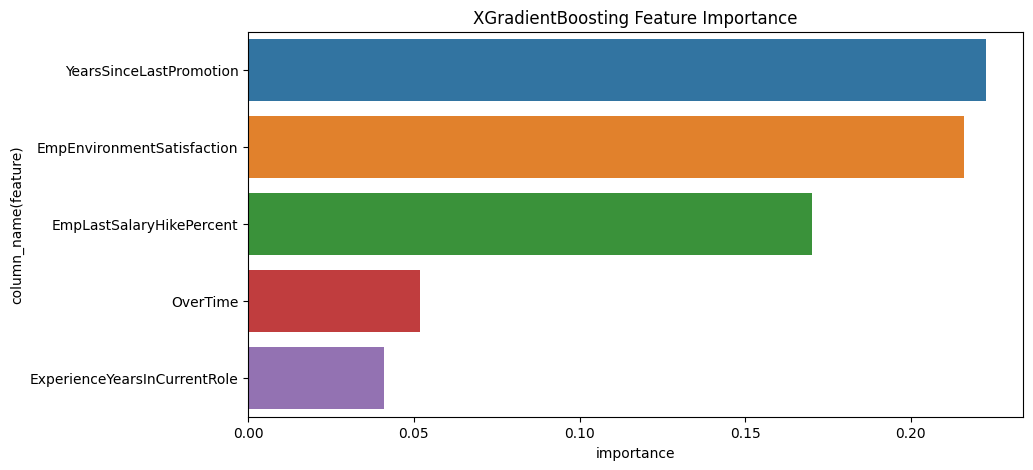

In [ ]:
plt.figure(figsize=(10,5))
plt.title('XGradientBoosting Feature Importance')
sns.barplot(data=tree_importance_data.sort_values(by = 'importance', ascending=False).head(5), x='importance', y='column_name(feature)');

**Most RF important features : Employment environtmnet satisfaction, years since last promation, emp salary hike**

As employee needs good motivation to work around

# **Data Analysis Report**
The project aimed to develop a machine learning model to predict employees Performance Ratings based on a dataset consisting of 28 variables. The project involved several key steps, including data exploration, data preprocessing, model building and training, and model evaluation.

###**Data Exploration**:
During the data exploration phase, conducted an initial analysis of the dataset to gain insights into its characteristics. One important observation was the imbalance in the distribution of target labels, which could potentially affect model performance. Additionally, noted that a substantial portion of the dataset comprised categorical columns, which required conversion into numerical format for model training. Furthermore, identified certain columns that were deemed unnecessary for building an effective model and decided to drop them.

###**Data Preprocessing**:
In the data preprocessing stage, addressed various issues to prepare the data for model training. This included addressing incorrect data types of columns and applying encoding techniques such as LabelEncoders to convert categorical variables into numerical representations. Also conducted manual encoding where necessary. To streamline the dataset and prevent overfitting or underfitting, removed columns that exhibited little or no relationship with the target variable.

###**Model Building and Training**:
I constructed several machine learning models, including LogisticRegression, K nearest Neighbour, RandomForestClassifier, Gradient Boost, XG Boost and ANN_MLPClassifier. These models were trained on the preprocessed dataset to learn patterns and associations that could aid in predicting employee Performance Ratings effectively.

###**Model Evaluation**:
To assess the performance of trained models, i used various evaluation metrics, such as accuracy and F1 score , and find the best model for deployment.

#**Report on Challenges faced**
Throughout the course of this project, several challenges were encountered and successfully addressed. These challenges can be categorized into three main areas: Feature Selection, Gaining Insights, and Model Selection.

**Feature Selection** : Columns that exhibited little to no correlation with the target variable were identified and subsequently dropped from the dataset.

**Gaining Insights** : Some of the variables in the dataset contained more than five unique values, making it challenging to extract precise insights, especially when compared to the target variable.

**Model Selection** : It was observed that several models in the candidate pool yielded similar accuracy levels. This made the process of model selection a nuanced decision. To address this challenge, the project shifted focus to evaluating models based on a more comprehensive set of metrics, including Accuracy and F1 score.

#**Recommendations to improve the employee performance based on insights from analysis**.
* Develop personalized training modules based on employees' experience levels.
* Ensure competitive compensation, especially for those with hourly rates above 85.
* Facilitate quicker promotions within 4 years to boost motivation.
* Offer flexible work arrangements to employees living within 10 km of the office.
* Address performance disparities in Sales and R&D through targeted initiatives.
* Tailor support for employees in Life Science, Medicine, and Marketing.
*  The company should provide a better environment as it increases the performance drastically.
* The company should increase the salary of the employee from time to time and help them maintain a worklife balance.
* On the other hand, shuffling the manager from time to time will also affect performance.